In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

### Import Tables

a) Import table "sales.xlsx"

In [2]:
sales = pd.read_excel('sales.xlsx')
#sales.set_index('CustomerID', inplace = True)
sales

CustomerID       Date_Adherence  Recency  MntMeat&Fish  MntEntries  \
0          11054  2021-03-18 00:00:00     85.0        7230.0        1820   
1          17117  2021-03-01 00:00:00     96.0        5850.0         320   
2          31751  2021-11-01 00:00:00      7.0        8380.0           0   
3          12947  2022-05-19 00:00:00     54.0        5090.0         280   
4          11402  2021-01-01 00:00:00     64.0         330.0           0   
...          ...                  ...      ...           ...         ...   
7003       23699  2021-11-27 00:00:00     54.0         290.0          20   
7004       23255  2021-03-25 00:00:00     27.0         230.0          80   
7005        5798  2022-04-12 00:00:00     36.0        3050.0        2460   
7006       16577  2020-09-01 00:00:00     49.0          20.0         200   
7007       25310  2020-12-05 00:00:00     74.0         160.0         100   

      MntVegan&Vegetarian  MntDrinks  MntDesserts  MntAdditionalRequests  \
0                  3435.0     1600.0        440.0                   57.0   
1                  2745.0      500.0        320.0                    8.0   
2                  1560.0        0.0          0.0                   28.0   
3                  2355.0      140.0        560.0                   78.0   
4                   240.0        0.0          0.0                    7.0   
...                   ...        ...          ...                    ...   
7003                180.0        0.0         40.0                    4.0   
7004                525.0       20.0         80.0                   23.0   
7005               3840.0     1800.0        980.0                  107.0   
7006                 90.0      160.0          0.0                   14.0   
7007                180.0      680.0         80.0                   13.0   

      NumOfferPurchases  NumAppPurchases  NumTakeAwayPurchases  \
0                     1               13                     4   
1                     3                9                     7   
2                     3                9                     5   
3                     3                7                     5   
4                     2                4                     1   
...                 ...              ...                   ...   
7003                  2                4                     1   
7004                  3                5                     1   
7005                  1                8                     4   
7006                  1                3                     2   
7007                  3                3                     2   

      NumStorePurchases  NumAppVisitsMonth  Complain  
0                    13                  6         0  
1                     9                  6         0  
2                     3                  9         0  
3                    11                  3         0  
4                     3                  8         0  
...                 ...                ...       ...  
7003                  4                  7         0  
7004                  3                  8         0  
7005                 13                  4         0  
7006                  2                  8         1  
7007                  4                  4         0  

[7008 rows x 15 columns]

b) Import table "crm.xlsx"

In [3]:
crm = pd.read_csv('crm.csv')
crm.set_index('CustomerID', inplace = True)
crm

Name  Birthyear   Education Marital_Status  \
CustomerID                                                               
14594            Miss Leah Lewis       1981  Graduation         Single   
19070           Miss Grace Black       1974  Graduation       Together   
29888         Mr. Gavin Morrison       1960         PhD       Together   
12221            Mr. Ryan Glover       1980  Graduation        Married   
21107          Mr. Paul Anderson       1971  HighSchool         Single   
...                          ...        ...         ...            ...   
30686            Mr. John Hughes       1994         PhD       Divorced   
17210        Mr. Brandon Simpson       1985  Graduation       Divorced   
29186       Mr. Thomas Churchill       1967         PhD       Together   
23312         Miss Angela Murray       1989  Graduation         Single   
15581          Miss Diana Taylor       1960  Graduation         Single   

              Income  Kid_Younger6  Children_6to18  
CustomerID                                          
14594       113947.0             0               0  
19070       114297.0             0               0  
29888       115476.0             0               0  
12221       101172.0             1               1  
21107       123128.0             0               0  
...              ...           ...             ...  
30686        98968.0             0               0  
17210       109977.0             0               0  
29186        56039.0             0               1  
23312        44867.0             1               0  
15581       124379.0             0               0  

[7000 rows x 7 columns]

c) Import table "mkt.xlsx"

In [4]:
mkt = pd.read_csv('mkt.csv')
mkt[mkt.duplicated(subset= 'CustomerID', keep=False)]
mkt

CustomerID  Response_Cmp1  Response_Cmp2  Response_Cmp3  Response_Cmp4  \
0          31958              0              0              0              0   
1           5387              0              0              0              0   
2          32006              0              0              0              0   
3           7511              0              0              0              0   
4          12308              0              0              0              0   
...          ...            ...            ...            ...            ...   
7018       22358              0              0              0              0   
7019       29516              0              0              0              0   
7020       18890              0              0              0              0   
7021       30206              0              0              0              0   
7022       16466              0              0              0              0   

      Response_Cmp5  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
7018              0  
7019              0  
7020              0  
7021              0  
7022              0  

[7023 rows x 6 columns]

# 1. Basic Data Exploration

## 1.1. Table - "Sales"

d) Basic dataframe exploration

In [5]:
#sales.shape

In [6]:
#sales.columns

In [7]:
#sales.head(5)

In [8]:
#sales.tail(5)

In [9]:
#sales.info()

Variables Types:

- 6 float variables
- 8 integer variables
- 1 object variable

e) Dataframe Summary

In [10]:
#sales.describe()

- `count` we can see that the variable 'Recency' and 'MntDrinks' don't have the 7008 rows filled, this means we have a problem with NA's.
- Close relationship between Drinks, desserts and entries (Verysimilar location statistics)

f) Skewness

In [11]:
#sales.skew()

- `Moderate skewness` : NumAppPurchases  and NumStorePurchases
- `High skewness` : MntMeat&Fish, MntEntries, MntVegan&Vegetarian,MntDrinks,MntDesserts, MntAdditionalRequests, NumOfferPurchases, NumTakeAwayPurchases, NumAppVisitsMonth and   Complain

g) Kurtosis - (SIGNIFICADO!!!)

In [12]:
#sales.kurt()

`high Kurtosis (>3): `
 - MntEntries                
 - MntVegan&Vegetarian      
 - MntDrinks                 
 - MntDesserts               
 - MntAdditionalRequests    
 - NumOfferPurchases 
 - NumTakeAwayPurchases
 - NumAppVisitsMonth         
 - Complain  

### 1.1.1. Visual Exploration 

h) Histograms

Text(0.5, 1.0, 'NumAppVisitsMonth')

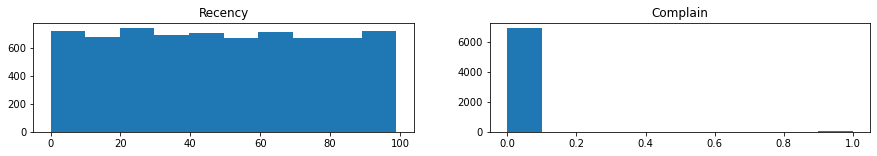

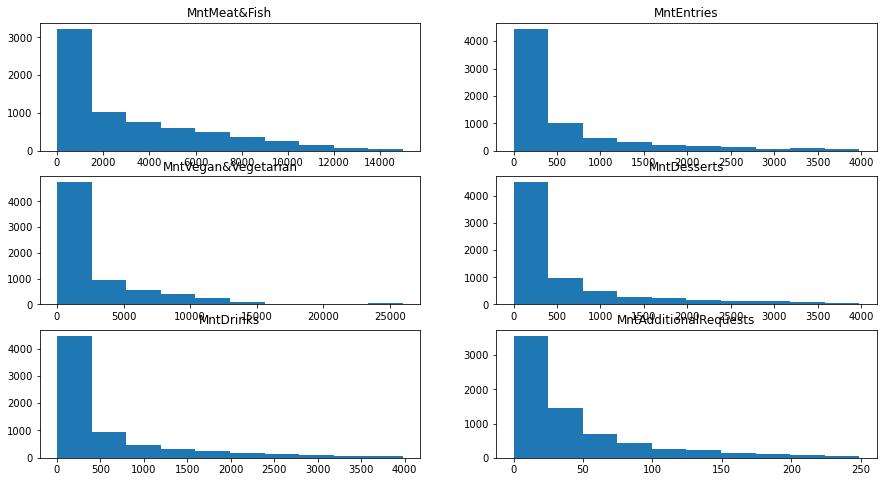

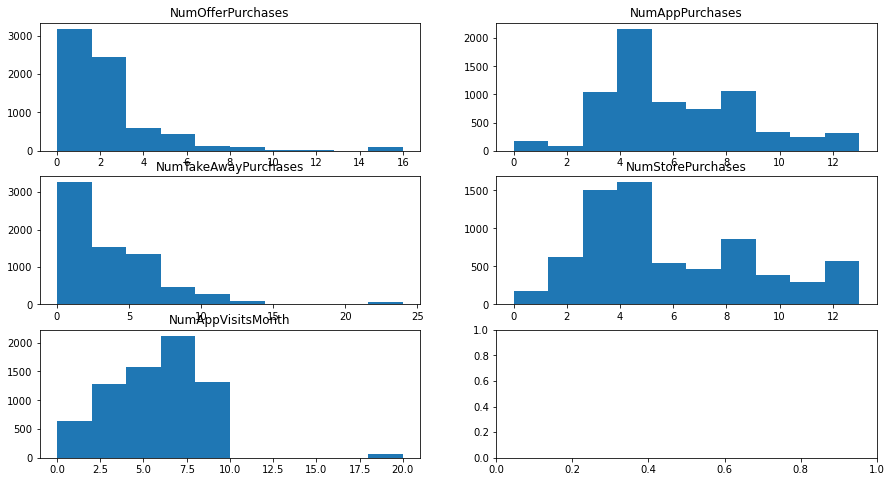

In [13]:
fig, [ax6,ax7] = plt.subplots(nrows=1, ncols = 2, figsize=(15,2)) 
ax6.hist(sales['Recency'])
ax7.hist(sales['Complain'])

fig, [[ax0,ax1],[ax2,ax3],[ax4,ax5]] = plt.subplots(nrows=3, ncols = 2, figsize=(15,8)) 
ax0.hist(sales['MntMeat&Fish'])
ax1.hist(sales['MntEntries'])
ax2.hist(sales['MntVegan&Vegetarian'])
ax3.hist(sales['MntDesserts'])
ax4.hist(sales['MntDrinks'])
ax5.hist(sales['MntAdditionalRequests'])

fig, [[ax8,ax9],[ax10,ax11],[ax12,ax13]] = plt.subplots(nrows=3, ncols = 2, figsize=(15,8))
ax8.hist(sales['NumOfferPurchases'])            
ax9.hist(sales['NumAppPurchases'])          
ax10.hist(sales['NumTakeAwayPurchases'])   
ax11.hist(sales['NumStorePurchases'])        
ax12.hist(sales['NumAppVisitsMonth'])   

#TITULOS E LABELS
ax6.set_title ('Recency')
ax7.set_title ('Complain')
ax0.set_title('MntMeat&Fish')
ax1.set_title('MntEntries')
ax2.set_title('MntVegan&Vegetarian')
ax3.set_title('MntDesserts')
ax4.set_title('MntDrinks')
ax5.set_title('MntAdditionalRequests')
ax8.set_title('NumOfferPurchases')            
ax9.set_title('NumAppPurchases')          
ax10.set_title('NumTakeAwayPurchases')   
ax11.set_title('NumStorePurchases')        
ax12.set_title('NumAppVisitsMonth')

i) Correlograma

<AxesSubplot:>

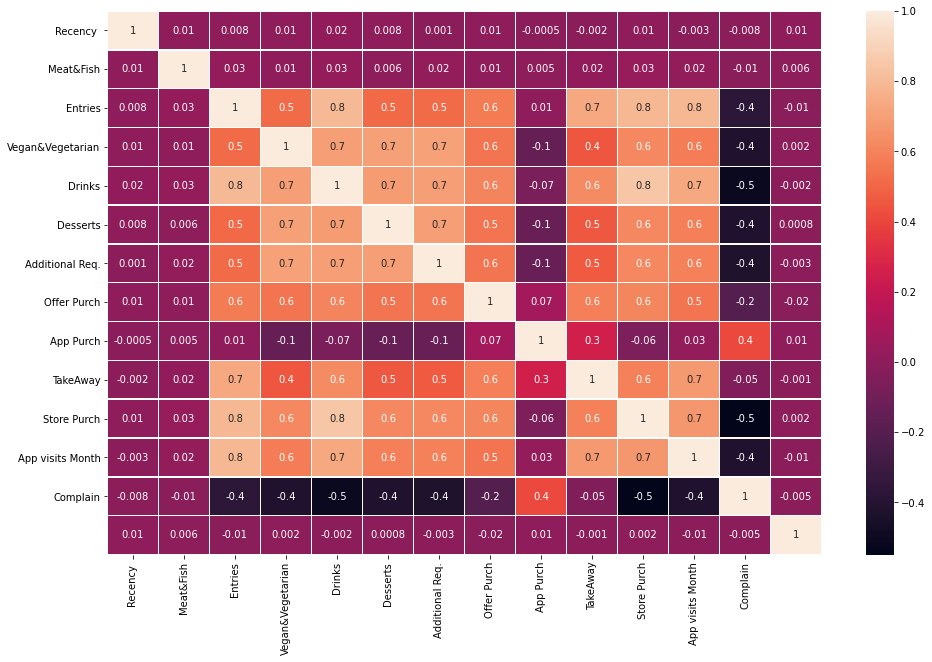

In [14]:
sales_corr = sales.corr(method = 'spearman')
figure = plt.figure(figsize=(16,10))


x_axis_labels = ['Recency ', 'Meat&Fish', 'Entries', 'Vegan&Vegetarian', 'Drinks', 'Desserts', 'Additional Req.',
                'Offer Purch','App Purch',  'TakeAway', 'Store Purch', 'App visits Month', 'Complain'] # labels for x-axis
y_axis_labels = ['Recency ', 'Meat&Fish', 'Entries', 'Vegan&Vegetarian', 'Drinks', 'Desserts', 'Additional Req.',
                'Offer Purch','App Purch',  'TakeAway', 'Store Purch', 'App visits Month', 'Complain'] # labels for y-axis

sns.heatmap(sales_corr, annot=True, fmt = '.1g', 
            xticklabels=x_axis_labels,yticklabels=y_axis_labels,
           linewidth=0.5)

 - Correlation coefficients whose magnitude are between 0.9 and 1.0 indicate variables which can be considered very highly correlated.
 - Correlation coefficients whose magnitude are between 0.7 and 0.9 indicate variables which can be considered highly correlated
 - Correlation coefficients whose magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated.
 - Correlation coefficients whose magnitude are between 0.3 and 0.5 indicate variables which have a low correlation.

 - `Recency`: has a low correlation with all of the variables
 - `Offer Purchases`: has a low correlation with all of the variables
 - `Complain`:has a low correlation with all of the variables
 - the rest of the variables atre all moderately correlated between each other.

# 2. Data Cleaning & Pre-Processing & Initial Data Transformation

## 2.1. Table - "Sales"

j) Check for duplicates

In [15]:
#sales [sales.duplicated()]
sales.drop_duplicates(inplace= True)

k) Check for NAs & Fill NAs

In [16]:
#sales.isna().sum()

## Input "Recency" with the mean
sales.fillna({'Recency': sales['Recency'].mean()}, inplace = True)
#Turn "Recency" into integer
sales['Recency']= np.round(sales['Recency']).astype(int)

## Inpute "MntDrinks" using KNNInputer
#we are using this variables to inpute values because they have a correlation > 0.7
sales_products = sales[['MntDrinks','MntDesserts','MntEntries','MntVegan&Vegetarian']]

imputer = KNNImputer(n_neighbors=1)
array_impute = imputer.fit_transform(sales_products) # this is an array
sales_products = pd.DataFrame(array_impute, columns = sales_products.columns)

sales['MntDrinks'] = sales_products['MntDrinks'].values

l) check if there is negative values in the variables 

In [17]:
(sales [['Recency','Complain','MntMeat&Fish','MntEntries','MntVegan&Vegetarian',
      'MntDesserts','MntDrinks', 'MntAdditionalRequests','NumOfferPurchases','NumAppPurchases','NumTakeAwayPurchases',
      'NumStorePurchases', 'NumAppVisitsMonth']] < 0).sum()

Recency                  0
Complain                 0
MntMeat&Fish             0
MntEntries               0
MntVegan&Vegetarian      0
MntDesserts              0
MntDrinks                0
MntAdditionalRequests    0
NumOfferPurchases        0
NumAppPurchases          0
NumTakeAwayPurchases     0
NumStorePurchases        0
NumAppVisitsMonth        0
dtype: int64

m) check if `Recency = 99.0` is code for something

In [18]:
(sales [['Recency']] == 99).sum()

Recency    59
dtype: int64

In [19]:
sales_R99 =sales[sales["Recency"] == 99 ]
sales_R99

#Recency=99 doesn't seem a code 

CustomerID       Date_Adherence  Recency  MntMeat&Fish  MntEntries  \
111        30641  2022-06-27 00:00:00       99        4530.0         760   
350         5156  2021-02-17 00:00:00       99         450.0           0   
388        20438  2021-11-11 00:00:00       99        8300.0         240   
408        14783  2022-05-26 00:00:00       99        7070.0        1140   
534        12848  2022-06-14 00:00:00       99          10.0         180   
691        28967  2022-01-03 00:00:00       99         260.0           0   
757        34463  2021-07-10 00:00:00       99        1638.0        1920   
765        10796  2022-02-12 00:00:00       99         550.0           0   
984        17906  2022-03-31 00:00:00       99       13850.0         780   
1174       32612  2021-03-10 00:00:00       99        4710.0        1880   
1508       26216  2022-05-27 00:00:00       99         480.0          60   
1588       32387  2022-02-03 00:00:00       99        8340.0        1080   
1672       31913  2022-05-31 00:00:00       99        7300.0           0   
1780       19301  2021-09-16 00:00:00       99         100.0           0   
1905       22619  2021-02-26 00:00:00       99          20.0         100   
1908       24035  2021-10-22 00:00:00       99         690.0         160   
2224       11324  2021-06-18 00:00:00       99        8720.0         436   
2252       12713  2021-10-02 00:00:00       99        4210.0         100   
2344        8372  2021-07-18 00:00:00       99          50.0         340   
2353       22532  2021-11-28 00:00:00       99         110.0         220   
2478        8798  2021-12-04 00:00:00       99        4700.0         180   
2522       10043  2022-05-30 00:00:00       99          60.0         260   
2783       20954  2020-12-04 00:00:00       99        1850.0          40   
2951        5249  2021-08-27 00:00:00       99         140.0         160   
3073       19010  2020-09-02 00:00:00       99        1685.0         480   
3109       13853  2022-03-08 00:00:00       99        1790.0         760   
3250       15353  2021-03-08 00:00:00       99        3720.0         360   
3351       27968  2020-09-05 00:00:00       99        4300.0           0   
3426       19910  2020-12-08 00:00:00       99         260.0          20   
3570       32288  2021-03-03 00:00:00       99        5850.0        1420   
3831       29969  2022-03-17 00:00:00       99           0.0         120   
3959       34214  2021-04-23 00:00:00       99         210.0          20   
4315       20105  2021-01-12 00:00:00       99        7350.0         448   
4360       22853  2022-04-03 00:00:00       99         840.0           0   
4373       30842  2021-03-03 00:00:00       99       11660.0        1220   
4389       14969  2020-11-28 00:00:00       99        3270.0         560   
4454        6593  2022-03-16 00:00:00       99        3800.0         160   
4648       12101  2022-06-16 00:00:00       99        4510.0         100   
4740       13748  2021-03-27 00:00:00       99        1152.0           0   
4903       34700  2020-09-11 00:00:00       99        7500.0        3500   
4906        5594  2022-06-24 00:00:00       99          30.0          80   
4920       30299  2020-11-29 00:00:00       99        4900.0           0   
5059       20360  2020-12-18 00:00:00       99        6450.0         140   
5209        8624  2022-03-04 00:00:00       99       10540.0         340   
5241        7277  2020-10-11 00:00:00       99        4200.0        1060   
5485       26963  2021-05-21 00:00:00       99        1170.0         420   
5745       34115  2020-11-03 00:00:00       99          20.0         540   
5858       17981  2020-11-30 00:00:00       99        2670.0         760   
5916        7832  2021-06-27 00:00:00       99        5010.0         360   
5930       22148  2020-11-02 00:00:00       99        1523.0        1180   
6061       13388  2021-01-23 00:00:00       99           5.0          20   
6195       26660  2021-01-04 00:00:00       99        

## 2.2. Demographic Table - "CRM"

### 2.2.1. Clean Data 

n) Check for duplicates

In [20]:
#crm[crm.duplicated()]

o) Check for NAs & Fill NAs

In [21]:
#crm.isnull().sum()

## Substitute missing values with the mode
crm['Education'] = crm['Education'].fillna(crm['Education'].mode()[0])

p) Consistency accross the variables/categories

In [22]:
## Putting everything upper case
crm['Education'] = crm['Education'].str.upper()
crm['Marital_Status']=crm['Marital_Status'].str.upper()

## Change together to married 
crm['Marital_Status'] = crm['Marital_Status'].replace('TOGETHER','MARRIED')
#crm['Marital_Status'].value_counts()

### 2.2.2. Add useful variables (data transformation)

q) Add column with gender - dummy variable - easier to read

In [23]:
## Check for all unique prefixes, we extract the first 4 letters of each name

crm['First 4 Letters'] = crm['Name'].str.slice(stop=4)

# get the unique combinations of the first 5 letters
unique_combinations = crm['First 4 Letters'].unique()

# print the unique combinations
print(unique_combinations)

crm['Name'].isnull().any()

#Now, we do the encoding. If the first 4 characters contain any variation of mrs or miss, we substitute the name by 1
#if it's any variation of 'mr.' we substitute by 0

# create a copy of the 'Name' column
crm['Gender'] = crm['Name']

# replace 'Miss' or 'Mrs.' with 1 and 'Mr.' with 0 in the 'Gender' column
crm.loc[crm['Gender'].str.contains(r'^((M|m)iss|(M|m)rs\.)', na=False), 'Gender'] = 1
crm.loc[crm['Gender'].str.contains(r'^(Mr\.|(M|m)r)', na=False), 'Gender'] = 0

# convert the 'Gender' column to integer type
crm['Gender'] = crm['Gender'].astype(float).fillna(0).astype(int)

#check new column
crm['Gender']

crm = crm.drop(columns=['First 4 Letters'])

['Miss' 'Mr. ' 'Mrs.']


C:\Users\lara_\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


r) Transform "Birthyear" into "Age"

In [24]:
## Convert the "Birthyear" to an 'Age' column
import datetime

#calculate the current year
current_year = datetime.datetime.now().year

#create a new column 'Age' by subtracting birth_year from current year
crm['Age'] = current_year - crm['Birthyear']

# drop
crm = crm.drop('Birthyear', axis=1)
crm

Name   Education Marital_Status    Income  \
CustomerID                                                              
14594            Miss Leah Lewis  GRADUATION         SINGLE  113947.0   
19070           Miss Grace Black  GRADUATION        MARRIED  114297.0   
29888         Mr. Gavin Morrison         PHD        MARRIED  115476.0   
12221            Mr. Ryan Glover  GRADUATION        MARRIED  101172.0   
21107          Mr. Paul Anderson  HIGHSCHOOL         SINGLE  123128.0   
...                          ...         ...            ...       ...   
30686            Mr. John Hughes         PHD       DIVORCED   98968.0   
17210        Mr. Brandon Simpson  GRADUATION       DIVORCED  109977.0   
29186       Mr. Thomas Churchill         PHD        MARRIED   56039.0   
23312         Miss Angela Murray  GRADUATION         SINGLE   44867.0   
15581          Miss Diana Taylor  GRADUATION         SINGLE  124379.0   

            Kid_Younger6  Children_6to18  Gender  Age  
CustomerID                                             
14594                  0               0       1   42  
19070                  0               0       1   49  
29888                  0               0       0   63  
12221                  1               1       0   43  
21107                  0               0       0   52  
...                  ...             ...     ...  ...  
30686                  0               0       0   29  
17210                  0               0       0   38  
29186                  0               1       0   56  
23312                  1               0       1   34  
15581                  0               0       1   63  

[7000 rows x 8 columns]

In [105]:
# defining Age groups
bins = [18, 25, 35, 45, 65,100] # define age groups
labels = ['18-25', '25-35','35-45', '45-65', '65+'] # define the labels for each age group, as INE does 
crm['age_group'] = pd.cut(crm['Age'], bins=bins, labels=labels) # add a new column with the age groups
crm

Name   Education Marital_Status    Income  \
CustomerID                                                              
14594            Miss Leah Lewis  GRADUATION         SINGLE  113947.0   
19070           Miss Grace Black  GRADUATION        MARRIED  114297.0   
29888         Mr. Gavin Morrison         PHD        MARRIED  115476.0   
12221            Mr. Ryan Glover  GRADUATION        MARRIED  101172.0   
21107          Mr. Paul Anderson  HIGHSCHOOL         SINGLE  123128.0   
...                          ...         ...            ...       ...   
30686            Mr. John Hughes         PHD       DIVORCED   98968.0   
17210        Mr. Brandon Simpson  GRADUATION       DIVORCED  109977.0   
29186       Mr. Thomas Churchill         PHD        MARRIED   56039.0   
23312         Miss Angela Murray  GRADUATION         SINGLE   44867.0   
15581          Miss Diana Taylor  GRADUATION         SINGLE  124379.0   

            Kid_Younger6  Children_6to18  Gender  Age age_group  
CustomerID                                                       
14594                  0               0       1   42     35-45  
19070                  0               0       1   49     45-65  
29888                  0               0       0   63     45-65  
12221                  1               1       0   43     35-45  
21107                  0               0       0   52     45-65  
...                  ...             ...     ...  ...       ...  
30686                  0               0       0   29     25-35  
17210                  0               0       0   38     35-45  
29186                  0               1       0   56     45-65  
23312                  1               0       1   34     25-35  
15581                  0               0       1   63     45-65  

[7000 rows x 9 columns]

## 2.3. Marketing Table - "mkt.xlsx"

### 2.3.1. Data Cleaning

s) Check for duplicates

In [106]:
#mkt[mkt.duplicated()]

t) Check for NAs & Fill NAs

In [107]:
#mkt.isna().sum()

## 2.4. Merge all tables

u) Merge all tables

In [108]:
df = pd.merge(sales, crm, on='CustomerID')

In [109]:
df= pd.merge(df, mkt, on='CustomerID')

In [110]:
df.set_index('CustomerID', inplace = True)

v) Check for duplicates & and drop

In [111]:
#df[df.duplicated()]
df.drop_duplicates(inplace= True)

## 2.5. Outliers

- 1st There are variable with high Kurtosis, witch means there may be outliers;
- 2st see if exists outliers through histograms;
- If the outliers represent less than 3% drop observations;

Note: We will only drop outliers from variables that where included in the clusterings processes (done in all perspectives 1,2,3)

w) Histograms of clustering variables in the 1st Perspective

Text(0.5, 1.0, 'MntAdditionalRequests')

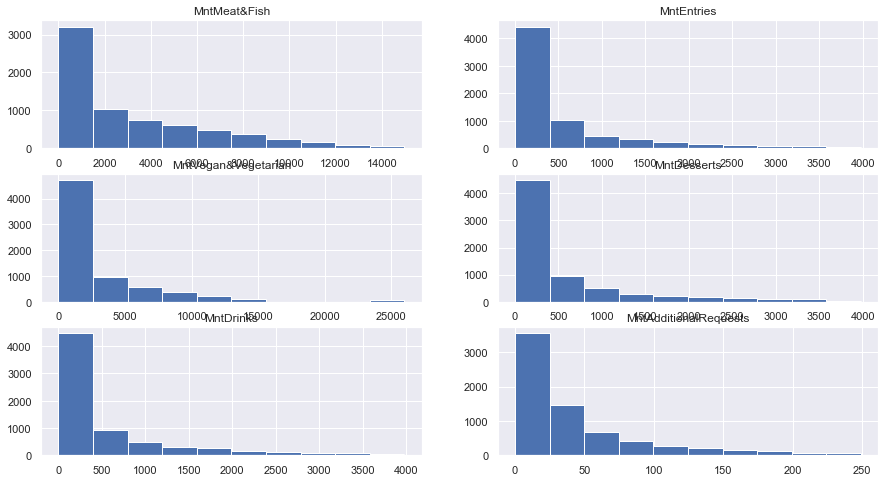

In [112]:

fig, [[ax0,ax1],[ax2,ax3],[ax4,ax5]] = plt.subplots(nrows=3, ncols = 2, figsize=(15,8)) 
ax0.hist(df['MntMeat&Fish'])
ax1.hist(df['MntEntries'])
ax2.hist(df['MntVegan&Vegetarian'])
ax3.hist(df['MntDesserts'])
ax4.hist(df['MntDrinks'])
ax5.hist(df['MntAdditionalRequests'])

#Titles
ax0.set_title('MntMeat&Fish')
ax1.set_title('MntEntries')
ax2.set_title('MntVegan&Vegetarian')
ax3.set_title('MntDesserts')
ax4.set_title('MntDrinks')
ax5.set_title('MntAdditionalRequests')

y) Histograms of clustering variables in the 2nd Perspective

Text(0.5, 1.0, 'NumStorePurchases')

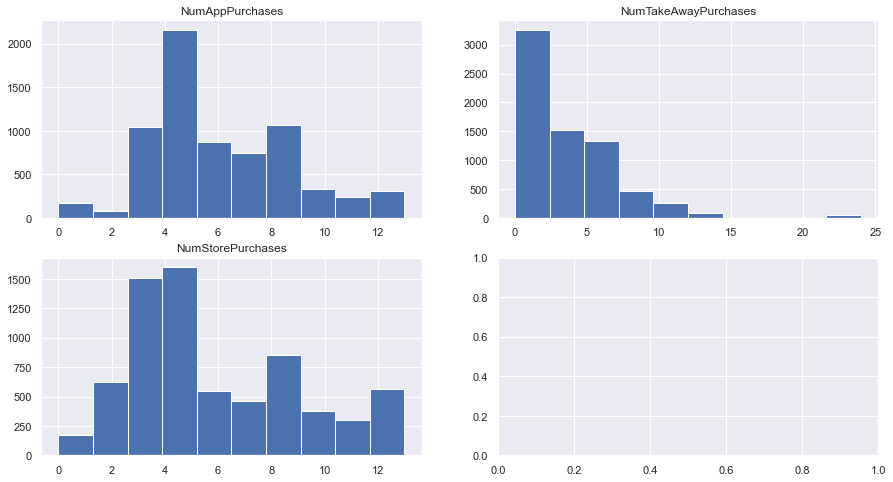

In [113]:
fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(nrows=2, ncols = 2, figsize=(15,8))           
ax1.hist(df['NumAppPurchases'])          
ax2.hist(df['NumTakeAwayPurchases'])   
ax3.hist(df['NumStorePurchases'])        
   
#Set the labels            
ax1.set_title('NumAppPurchases')          
ax2.set_title('NumTakeAwayPurchases')   
ax3.set_title('NumStorePurchases')        

z) Histograms of clustering variables in the 3rd Perspective

(array([ 331., 1275., 1615., 1657., 1467.,  552.,   17.,    0.,    0.,
          86.]),
 array([  2493.8   ,  26008.3925,  49522.985 ,  73037.5775,  96552.17  ,
        120066.7625, 143581.355 , 167095.9475, 190610.54  , 214125.1325,
        237639.725 ]),
 <BarContainer object of 10 artists>)

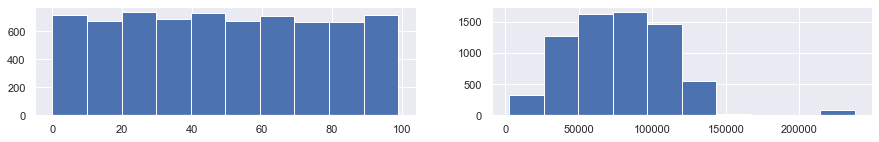

In [114]:
fig, [ax1,ax2] = plt.subplots(nrows=1, ncols = 2, figsize=(15,2)) 
ax1.hist(df['Recency'])
ax2.hist(df['Income'])

#In this prespective we sumed the amount spent and number of purchases by client.
#the other variables were already treat, we removed the outliers for the other prespectives.


Note: There are outliers in the following variables:
- Income 
- NumTakeAwayPurchases
- MntVegan&Vegetarian

aa) Drop outliers if they represent less than 3% of df

In [115]:
# percentage of outliers in Income 
(sum(df['Income'] > 200000)/7000)*100

1.2285714285714284

In [116]:
# percentage of outliers in NumTakeAwayPurchases 
(sum(df['NumTakeAwayPurchases'] > 20)/7000)*100

0.8714285714285714

In [117]:
# percentage of outliers in MntVegan&Vegetarian 
(sum(df['MntVegan&Vegetarian'] > 22000)/7000)*100

0.8999999999999999

In [118]:
df = df.drop(df[df['Income'] > 200000].index)

In [119]:
df = df.drop(df[df['NumTakeAwayPurchases'] > 20].index)

In [120]:
df = df.drop(df[df['MntVegan&Vegetarian'] > 20000].index)

# 3. 1st Perspective - Consumption patterns/types

EXPLICAÇÃO DA PERSPECTIVA:
- Objetivos;
- Interesse;
- variáveis foco;

## 3.1. Dataframe Preparation

ab) Creat new data frame with only the "Mnt" variables

In [121]:
df_mnt_pre_normalize=(df[['MntMeat&Fish','MntEntries','MntDrinks','MntAdditionalRequests','MntDesserts','MntVegan&Vegetarian']]).copy()

In [122]:
df_mnt_pre_normalize

MntMeat&Fish  MntEntries  MntDrinks  MntAdditionalRequests  \
CustomerID                                                               
11054             7230.0        1820     1600.0                   57.0   
17117             5850.0         320      500.0                    8.0   
31751             8380.0           0        0.0                   28.0   
12947             5090.0         280      140.0                   78.0   
11402              330.0           0        0.0                    7.0   
...                  ...         ...        ...                    ...   
23699              290.0          20        0.0                    4.0   
23255              230.0          80       20.0                   23.0   
5798              3050.0        2460     1800.0                  107.0   
16577               20.0         200      160.0                   14.0   
25310              160.0         100      680.0                   13.0   

            MntDesserts  MntVegan&Vegetarian  
CustomerID                                    
11054             440.0               3435.0  
17117             320.0               2745.0  
31751               0.0               1560.0  
12947             560.0               2355.0  
11402               0.0                240.0  
...                 ...                  ...  
23699              40.0                180.0  
23255              80.0                525.0  
5798              980.0               3840.0  
16577               0.0                 90.0  
25310              80.0                180.0  

[6890 rows x 6 columns]

ac) Standardization using MinMax method


In [123]:
# create a new DataFrame with the columns you want to standardize
cols_to_standardize = ['MntMeat&Fish','MntEntries','MntDrinks','MntAdditionalRequests','MntDesserts','MntVegan&Vegetarian']
data_to_standardize = df_mnt_pre_normalize[cols_to_standardize]

# standardize the data
scaler = MinMaxScaler()
standardized_data = scaler.fit_transform(data_to_standardize)

# create a new DataFrame with standardized data and column names
standardized_df = pd.DataFrame(data=standardized_data, columns=cols_to_standardize, index=df_mnt_pre_normalize.index)

# merge back into the original DataFrame
df_mnt = pd.merge(df_mnt_pre_normalize.drop(cols_to_standardize, axis=1), standardized_df, left_index=True, right_index=True)
df_mnt

MntMeat&Fish  MntEntries  MntDrinks  MntAdditionalRequests  \
CustomerID                                                               
11054           0.482644    0.457286   0.402010               0.228916   
17117           0.390521    0.080402   0.125628               0.032129   
31751           0.559413    0.000000   0.000000               0.112450   
12947           0.339786    0.070352   0.035176               0.313253   
11402           0.022029    0.000000   0.000000               0.028112   
...                  ...         ...        ...                    ...   
23699           0.019359    0.005025   0.000000               0.016064   
23255           0.015354    0.020101   0.005025               0.092369   
5798            0.203605    0.618090   0.452261               0.429719   
16577           0.001335    0.050251   0.040201               0.056225   
25310           0.010681    0.025126   0.170854               0.052209   

            MntDesserts  MntVegan&Vegetarian  
CustomerID                                    
11054          0.110553             0.229229  
17117          0.080402             0.183183  
31751          0.000000             0.104104  
12947          0.140704             0.157157  
11402          0.000000             0.016016  
...                 ...                  ...  
23699          0.010050             0.012012  
23255          0.020101             0.035035  
5798           0.246231             0.256256  
16577          0.000000             0.006006  
25310          0.020101             0.012012  

[6890 rows x 6 columns]

## 3.2. Analysis with PCA 
- https://statisticsglobe.com/principal-component-analysis-python

In [124]:
df_pca= df_mnt.copy()

In [125]:
from sklearn.decomposition import PCA

### 3.2.1 Choosing number of Principal Components

In [77]:
pca = PCA(n_components=6)
pca.fit_transform(df_pca)

array([[ 3.82070170e-01,  2.32883927e-02, -4.61680006e-02,
         1.58215723e-01, -1.88063797e-01, -2.12203688e-01],
       [-1.19343599e-02,  1.69148523e-01, -1.60133519e-01,
         3.62949984e-02,  1.59278901e-02, -6.15724372e-02],
       [-6.86615449e-02,  4.02321992e-01, -7.80001643e-02,
        -2.67156117e-04,  6.10865856e-03, -1.26178383e-01],
       ...,
       [ 4.76523870e-01, -2.86648617e-01,  1.63052748e-01,
         8.41263725e-02, -2.39692689e-01, -1.18415646e-01],
       [-3.36595283e-01, -7.97740816e-02, -4.53260826e-03,
         2.17690804e-02, -2.79985977e-02,  4.68305712e-03],
       [-2.80081447e-01, -1.18467379e-01, -1.64423442e-02,
         1.09993327e-01,  4.11400737e-02, -2.44485021e-02]])

array([[ 3.82070170e-01,  2.32883927e-02, -4.61680006e-02,
         1.58215723e-01, -1.88063797e-01, -2.12203688e-01],
       [-1.19343599e-02,  1.69148523e-01, -1.60133519e-01,
         3.62949984e-02,  1.59278901e-02, -6.15724372e-02],
       [-6.86615449e-02,  4.02321992e-01, -7.80001643e-02,
        -2.67156117e-04,  6.10865856e-03, -1.26178383e-01],
       ...,
       [ 4.76523870e-01, -2.86648617e-01,  1.63052748e-01,
         8.41263725e-02, -2.39692689e-01, -1.18415646e-01],
       [-3.36595283e-01, -7.97740816e-02, -4.53260826e-03,
         2.17690804e-02, -2.79985977e-02,  4.68305712e-03],
       [-2.80081447e-01, -1.18467379e-01, -1.64423442e-02,
         1.09993327e-01,  4.11400737e-02, -2.44485021e-02]])

In [78]:
prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

In [79]:
eigenvalues

array([0.14873695, 0.03365473, 0.02860163, 0.01869408, 0.01746301,
       0.01470622])

array([0.14873695, 0.03365473, 0.02860163, 0.01869408, 0.01746301,
       0.01470622])

In [80]:
import plotly.graph_objs as go

PC_numbers = np.arange(pca.n_components_) + 1

trace = go.Scatter(x=PC_numbers, 
                   y=prop_var,
                   mode='lines+markers',
                   marker=dict(color='red', size=8),
                   line=dict(width=2, color='black'))

layout = go.Layout(title='Figure 1: Scree Plot', 
                   xaxis=dict(title='Principal Component'),
                   yaxis=dict(title='Proportion of Variance'))

fig = go.Figure(data=[trace], layout=layout)
fig

- Using the elbow criteria we should retain 2 principal components 

In [81]:
import plotly.express as px

px.area(
    x=range(1, prop_var.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

NameError: name 'exp_var_cumul' is not defined

NameError: name 'exp_var_cumul' is not defined

### 3.2.2. PCA for 3 components (PC=3)

In [ ]:
pca = PCA(n_components=3)
PC = pca.fit_transform(df_pca)

In [ ]:
pca2_res = pd.DataFrame(data = PC, 
                            columns = ['PC1', 'PC2', 'PC3'])
 
pca2_res.head(6)

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
PC = pca.fit_transform(df_pca)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    PC, x=0, y=1, z=2, 
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

#### 3.2.2.1. Biplot

In [ ]:
def biplot(score,coef,labels=None):
 
    xs = score[:,0]
    ys = score[:,1]
    n = coef.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,
                s=5, 
                color='orange')
 
    for i in range(n): 
        plt.arrow(0, 0, coef[i,0], 
                  coef[i,1],color = 'purple',
                  alpha = 0.5)
        plt.text(coef[i,0]* 1.15, 
                 coef[i,1] * 1.15, 
                 labels[i], 
                 color = 'darkblue', 
                 ha = 'center', 
                 va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))    
 

    plt.figure()

In [ ]:
plt.title('Biplot of PCA')
 
biplot(PC, 
       np.transpose(pca.components_), 
       list(df_pca.columns))

## 3.3. Analysis without PCA 

### 3.3.1 K-means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# DO IT
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k).fit(df_mnt)
    inertias.append(model.inertia_)

In [ ]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for the x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for the y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks on the x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

In [ ]:
df_mnt.corr()

In [ ]:
df_mnt_k3 = df_mnt.copy()
model_k3 = KMeans(n_clusters=3, random_state = 100).fit(df_mnt)

In [ ]:
model_k3

In [ ]:
df_mnt_k3['k3 cluster'] = model_k3.labels_

In [ ]:
df_mnt_k3.groupby(['k3 cluster']).mean().transpose()

In [ ]:
descr3 = df_mnt_k3.groupby(['k3 cluster']).describe().transpose()
descr3

In [ ]:
df_mnt_k2 = df_mnt.copy()
model_k2 = KMeans(n_clusters=2, random_state = 100).fit(df_mnt)

In [ ]:
f_mnt_k2['k2'] = model_k2.labels_

In [ ]:
df_mnt_k2.groupby(['k2']).mean().transpose()

In [ ]:
descr2 = df_mnt_k2.groupby(['k2']).describe().transpose()
descr2

Visualization 

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_mnt_k2['MntEntries'], df_mnt_k2['MntMeat&Fish'], c=df_mnt_k2['k2'])
plt.xlabel('')
plt.ylabel('')
plt.title('KMeans Clustering with 2 clusters')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_mnt['MntEntries'], df_mnt['MntMeat&Fish'])
plt.xlabel('')
plt.ylabel('')
plt.title('KMeans Clustering with 2 clusters')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_mnt_k2['MntDrinks'], df_mnt_k2['MntEntries'])
plt.xlabel('')
plt.ylabel('')
plt.title('KMeans Clustering with 2 clusters')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create a list to store silhouette scores for different values of k
silhouette_scores = []

# Fit k-means clustering for different values of k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_mnt)
    score = silhouette_score(df_mnt, labels)
    silhouette_scores.append(score)

# Plot the silhouette scores for different values of k
import matplotlib.pyplot as plt
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.show()

In [ ]:
df_mnt_k4 = df_mnt.copy()
model_k4 = KMeans(n_clusters=4, random_state = 100).fit(df_mnt)

In [ ]:
df_mnt_k4['k4'] = model_k4.labels_

In [ ]:
df_mnt_k4.groupby(['k4']).mean().transpose()

In [ ]:
descr4 = df_mnt_k4.groupby(['k4']).describe().transpose()
descr4

In [ ]:
import matplotlib.pyplot as plt

# Select two variables to plot
x_var = 'MntMeat&Fish'
y_var = 'MntEntries'

# Create scatter plot with color-coded clusters
plt.scatter(df_mnt[x_var], df_mnt[y_var], c=kmeans.labels_)
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title('K-Means Clustering with k=4')
plt.show()


In [ ]:
df_mnt.corr()

#Let's try interpret MntEntries, MntDrinks and MntDesserts as supplements

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply MinMaxScaler to your dataframe
df_mnt_scaled = scaler.fit_transform(df_mnt)

# The df_mnt_scaled is now a numpy array with the same shape as your original dataframe

import pandas as pd

# Transform numpy array into dataframe
df_mnt_scaled = pd.DataFrame(df_mnt_scaled, columns=df_mnt.columns)

In [ ]:
df_mnt_scaled

In [ ]:
# DO IT
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k).fit(df_mnt_scaled)
    inertias.append(model.inertia_)

In [ ]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for the x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for the y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks on the x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

In [ ]:
df_k4 = df_mnt_scaled.copy()
k4 = KMeans(n_clusters=4, random_state = 100).fit(df_mnt)

In [ ]:
df_k4['k4_c'] = k4.labels_

In [ ]:
d4 = df_k4.groupby(['k4_c']).describe().transpose()
d4

In [ ]:
import matplotlib.pyplot as plt

# Select two variables to plot
x_var = 'MntMeat&Fish'
y_var = 'MntEntries'

# Create scatter plot with color-coded clusters
plt.scatter(df_k4[x_var], df_k4[y_var], c=kmeans.labels_)
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title('K-Means Clustering with k=4')
plt.show()

## 3.3. DBSCAN

## 3.4. Cluster analysis & caracterization

## 3.5. Business & Marketing insights

# 4. 2nd Perspective - Preference in the means of purchase

EXPLICAÇÃO DA PERSPECTIVA:

 - Objetivos;
 - Interesse;
 - variáveis foco;

## 4.1. Dataframe Preparation

## 4.2. K-means

## 4.3. DBSCAN

## 4.4. Fuzzy K-means (?)

## 4.5. Cluster analysis & caracterization

## 4.6. Business & Marketing insights

# 5. 3rd Perspective - Consumer value

EXPLICAÇÃO DA PERSPECTIVA:

- Objetivos;
- Interesse;
- variáveis foco;

## 5.1. Dataframe Preparation

x) Creating the Dataframe

In [126]:
cstm_value = df [[ 'Recency', 'MntMeat&Fish', 'MntEntries',
       'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts',
       'MntAdditionalRequests', 'NumOfferPurchases', 'NumAppPurchases',
       'NumTakeAwayPurchases', 'NumStorePurchases','Income',]].copy()

x) Creating the variables for total spent and purchases

In [127]:
#Total amount spent by costumer 
cstm_value = cstm_value.assign(t_Mnt = cstm_value['MntMeat&Fish'] + cstm_value['MntEntries'] + cstm_value['MntVegan&Vegetarian']
                              +cstm_value['MntDrinks']+cstm_value['MntDesserts']+cstm_value['MntAdditionalRequests'])

#Total of purchases by costumer 
cstm_value = cstm_value.assign(t_Num =  cstm_value['NumAppPurchases'] 
                              +cstm_value['NumTakeAwayPurchases']+cstm_value['NumStorePurchases'])

#drop of the columns 
cstm_value = cstm_value.drop(columns=['MntMeat&Fish', 'MntEntries', 'MntVegan&Vegetarian',                              
                                      'MntDrinks', 'MntDesserts', 'MntAdditionalRequests', 'NumAppPurchases',                                    
                                      'NumTakeAwayPurchases', 'NumStorePurchases', 'NumOfferPurchases'])
cstm_value

Recency    Income    t_Mnt  t_Num
CustomerID                                   
11054            85  107153.0  14582.0     30
17117            96   96725.0   9743.0     25
31751             7   84836.0   9968.0     17
12947            54  100682.0   8503.0     23
11402            64   65350.0    577.0      8
...             ...       ...      ...    ...
23699            54   38970.0    534.0      9
23255            27   55552.0    958.0      9
5798             36   97461.0  12237.0     25
16577            49   39333.0    484.0      7
25310            74   53909.0   1213.0      9

[6890 rows x 4 columns]

x) Standardization using MinMax method

In [128]:
from sklearn.preprocessing import MinMaxScaler

In [129]:
# create a new DataFrame with the columns you want to standardize
cols_to_standardize = ['Recency', 'Income', 't_Mnt', 't_Num']
data_to_standardize = cstm_value[cols_to_standardize]

# standardize the data
scaler = MinMaxScaler()
standardized_data = scaler.fit_transform(data_to_standardize)

# create a new DataFrame with standardized data and column names
standardized_df = pd.DataFrame(data=standardized_data, columns=cols_to_standardize, index=cstm_value.index)

# merge back into the original DataFrame
cstm_v_std = pd.merge(cstm_value.drop(cols_to_standardize, axis=1), standardized_df, left_index=True, right_index=True)

In [130]:
cstm_v_std

Recency    Income     t_Mnt     t_Num
CustomerID                                        
11054       0.858586  0.691103  0.438193  0.833333
17117       0.969697  0.621905  0.292612  0.694444
31751       0.070707  0.543012  0.299381  0.472222
12947       0.545455  0.648163  0.255307  0.638889
11402       0.646465  0.413707  0.016854  0.222222
...              ...       ...       ...       ...
23699       0.545455  0.238654  0.015560  0.250000
23255       0.272727  0.348689  0.028316  0.250000
5798        0.363636  0.626789  0.367644  0.694444
16577       0.494949  0.241063  0.014056  0.194444
25310       0.747475  0.337786  0.035988  0.250000

[6890 rows x 4 columns]

## 5.2. K-means

x) Run K-means

In [131]:
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k, random_state=100).fit(cstm_v_std)
    inertias.append(model.inertia_)

x) Use elbow method to see the optimal number of clusters (K)

In [134]:
import plotly.graph_objs as go
# Convert the `range` object to a list
ks = list(range(1, 11))
# Create a trace for the plot
trace = go.Scatter(x=ks, y=inertias, mode='lines+markers')
# Set the layout of the plot
layout = go.Layout(title='K-means clustering: KS vs. Inertias',xaxis=dict(title='number of clusters', tickfont=dict(size=12)),
    yaxis=dict(title='inertia', tickfont=dict(size=12)),
    width=600,
    height=400,
    margin=dict(l=50, r=50, b=50, t=50))
# Create a Figure object and add the trace and layout to it
fig = go.Figure(data=[trace], layout=layout)
fig.show()

Note: Using the elbow method we can see that 4 clusters may be the best number of clusters

x) Silhouette analisys for optimal K

In [135]:
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(cstm_v_std)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg.append(silhouette_score(cstm_v_std, cluster_labels))
# Create a trace for the plot
trace = go.Scatter(x=range_n_clusters, y=silhouette_avg, mode='lines+markers')
# Set the layout of the plot
layout = go.Layout(
    title='Silhouette analysis For Optimal K',xaxis=dict(title='Values of K', tickfont=dict(size=12)),
    yaxis=dict(title='Silhouette score', tickfont=dict(size=12)),
    width=600,
    height=400,
    margin=dict(l=50, r=50, b=50, t=50))
# Create a Figure object and add the trace and layout to it
fig = go.Figure(data=[trace], layout=layout)
fig.show()

Note: We can see the best option may be K=2, but we are interested in more segmentation of observation, therefore we will use the next best option witch is K=4

x) Dendogram

In [ ]:
  from scipy.cluster import hierarchy
#from sklearn.cluster import AgglomerativeClustering - The option available in sklearn

# Get a random sample, as hierarchical clustering can take a lot of time to run.
sales_vc_sample = cstm_v_std.sample(n = 1000, random_state = 100)

# create clusters using the "ward method"
clusters = hierarchy.linkage(cstm_v_std , method="ward")

# create the dendrogram using the hierarchy.dendrogram() method.
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)

### 5.2.1. Clustering, K=4

x) Create K-means model with 4 clusters

In [136]:
cstm_v_k4 = cstm_v_std.copy()
model_k4 = KMeans(n_clusters=4, random_state = 100).fit(cstm_v_k4)

x) Add new columns with clustering labels and analise

In [137]:
cstm_v_k4['k_label'] = model_k4.labels_

In [138]:
cstm_v_k4.groupby(['k_label']).mean().transpose()

k_label         0         1         2         3
Recency  0.754357  0.254448  0.246188  0.754780
Income   0.673001  0.329357  0.662659  0.339074
t_Mnt    0.441831  0.048416  0.411234  0.053901
t_Num    0.626585  0.275463  0.613135  0.285050

- Cluster 0 and 2 for recency, are the consumers who consumed the least time
- Income: cluster 1 and 2 are the ones that have a salary much higher than the average, almost twice as much as the other clusters
- t_Mnt: cluster 1 and 2 spend more 
- t_Num: cluster 1 and 2 buy more in number  
- Cluster 1 represents the most regular and the most valauble costumers, since it has a lower recency and these clients consume more than the cluster 0 and 3.
- Cluster 2 has a higher recency but is the one with higher consumption considering the other clusters (very close to cluster 1)


In [139]:
cstm_v_k4.groupby(['k_label']).describe().transpose()

k_label                  0            1            2            3
Recency count  1569.000000  1944.000000  1578.000000  1799.000000
        mean      0.754357     0.254448     0.246188     0.754780
        std       0.147277     0.149435     0.146101     0.144293
        min       0.474747     0.000000     0.000000     0.505051
        25%       0.626263     0.121212     0.121212     0.631313
        50%       0.747475     0.252525     0.252525     0.757576
        75%       0.878788     0.383838     0.373737     0.878788
        max       1.000000     0.505051     0.515152     1.000000
Income  count  1569.000000  1944.000000  1578.000000  1799.000000
        mean      0.673001     0.329357     0.662659     0.339074
        std       0.110920     0.126281     0.111483     0.130300
        min       0.315291     0.000000     0.323805     0.003136
        25%       0.590385     0.238035     0.581234     0.243531
        50%       0.675264     0.330142     0.658734     0.344688
        75%       0.755013     0.424347     0.743743     0.437224
        max       1.000000     0.652954     0.982541     0.693406
t_Mnt   count  1569.000000  1944.000000  1578.000000  1799.000000
        mean      0.441831     0.048416     0.411234     0.053901
        std       0.179651     0.049499     0.175017     0.054213
        min       0.125099     0.000000     0.103558     0.000202
        25%       0.289935     0.013507     0.271982     0.014342
        50%       0.422790     0.025819     0.386643     0.029158
        75%       0.567619     0.073541     0.528313     0.081506
        max       1.000000     0.294658     0.981979     0.357084
t_Num   count  1569.000000  1944.000000  1578.000000  1799.000000
        mean      0.626585     0.275463     0.613135     0.285050
        std       0.110211     0.099808     0.113250     0.107813
        min       0.333333     0.000000     0.333333     0.000000
        25%       0.555556     0.194444     0.527778     0.194444
        50%       0.611111     0.250000     0.611111     0.250000
        75%       0.694444     0.333333     0.694444     0.361111
        max       1.000000     0.583333     1.000000     0.611111

### Graphic Visualization of clusters

In [140]:
cluster0 = cstm_v_k4[cstm_v_k4.k_label==0]
cluster1 = cstm_v_k4[cstm_v_k4.k_label==1]
cluster2 = cstm_v_k4[cstm_v_k4.k_label==2]
cluster3 = cstm_v_k4[cstm_v_k4.k_label==3]

#### Histograms

x) `Recency` Histograms by Clusters

In [141]:
import plotly.graph_objs as go

# Create a list of histogram traces for each cluster
hist_traces = []
colors = ['red', 'yellow', 'green', 'blue']
cluster_names = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

for i, cluster in enumerate([cluster0, cluster1, cluster2, cluster3]):
    trace = go.Histogram(x=cluster['Recency'], nbinsx=20, name=cluster_names[i], marker=dict(color=colors[i]))
    hist_traces.append(trace)

# Create layout for the plot
layout = go.Layout(title='Recency Histograms by Cluster', xaxis=dict(title='Recency'))

# Create figure and plot histogram traces
fig = go.Figure(data=hist_traces, layout=layout)
fig.show()

x) Income Histograms by Clusters

In [142]:
import plotly.graph_objs as go

# Create a list of histogram traces for each cluster
hist_traces = []
colors = ['red', 'yellow', 'green', 'blue']
cluster_names = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

for i, cluster in enumerate([cluster0, cluster1, cluster2, cluster3]):
    trace = go.Histogram(x=cluster['Income'], nbinsx=20, name=cluster_names[i], marker=dict(color=colors[i]))
    hist_traces.append(trace)

# Create layout for the plot
layout = go.Layout(title='Income Histograms by Cluster', xaxis=dict(title='Income'))

# Create figure and plot histogram traces
fig = go.Figure(data=hist_traces, layout=layout)
fig.show()

x) Total Amount Expenditure Histograms by Cluster

In [143]:
# Create a list of histogram traces for each cluster
hist_traces = []
colors = ['red', 'yellow', 'green', 'blue']
cluster_names = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

for i, cluster in enumerate([cluster0, cluster1, cluster2, cluster3]):
    trace = go.Histogram(x=cluster['t_Mnt'], nbinsx=20, name=cluster_names[i], marker=dict(color=colors[i]))
    hist_traces.append(trace)

# Create layout for the plot
layout = go.Layout(title='Total Amount Expenditure Histograms by Cluster', xaxis=dict(title='Total Monthly Expenditure'))

# Create figure and plot histogram traces
fig = go.Figure(data=hist_traces, layout=layout)
fig.show()

x) Total Number of Purchases Histograms by Cluster

In [144]:
# Create a list of histogram traces for each cluster
hist_traces = []
colors = ['red', 'yellow', 'green', 'blue']
cluster_names = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

for i, cluster in enumerate([cluster0, cluster1, cluster2, cluster3]):
    trace = go.Histogram(x=cluster['t_Num'], nbinsx=20, name=cluster_names[i], marker=dict(color=colors[i]))
    hist_traces.append(trace)

# Create layout for the plot
layout = go.Layout(title='Total Number of Purchases Histograms by Cluster', xaxis=dict(title='Total Number of Purchases'))

# Create figure and plot histogram traces
fig = go.Figure(data=hist_traces, layout=layout)
fig.show()

#### Scatterplots

x) Get centroids in array

In [145]:
centroids = model_k4.cluster_centers_
centroids

array([[0.75453383, 0.67371443, 0.4429883 , 0.62686488],
       [0.25449973, 0.3292623 , 0.04834918, 0.27534865],
       [0.24649022, 0.66240258, 0.41057211, 0.6129571 ],
       [0.75486833, 0.33934821, 0.05422954, 0.28567024]])

In [146]:
centroid_0_Rnc = centroids[0,0]
centroid_1_Rnc = centroids[1,0]
centroid_2_Rnc = centroids[2,0]
centroid_3_Rnc = centroids[3,0]
centroid_0_Inc = centroids[0,1]
centroid_1_Inc = centroids[1,1]
centroid_2_Inc = centroids[2,1]
centroid_3_Inc = centroids[3,1]
centroid_0_Mnt = centroids[0,2]
centroid_1_Mnt = centroids[1,2]
centroid_2_Mnt = centroids[2,2]
centroid_3_Mnt = centroids[3,2]
centroid_0_Num = centroids[0,3]
centroid_1_Num = centroids[1,3]
centroid_2_Num = centroids[2,3]
centroid_3_Num = centroids[3,3]

x) Scatterplot t_Mnt - tNum

In [147]:
import plotly.graph_objs as go
# Create a trace for customer data
trace_cstm = go.Scatter(x=cstm_v_k4.t_Mnt,y=cstm_v_k4.t_Num,mode='markers',
                        marker=dict(size=10,color=cstm_v_k4.k_label,colorscale='Viridis'),name='Customer Data')
# Create traces for centroids
trace_centroid_0 = go.Scatter(x=[centroid_0_Mnt],y=[centroid_0_Num],mode='markers',
                              marker=dict(size=12,color='blue',symbol='x'),name='Centroid 0')
trace_centroid_1 = go.Scatter(x=[centroid_1_Mnt],y=[centroid_1_Num],mode='markers',
                              marker=dict(size=12,color='orange',symbol='star'),name='Centroid 1')
trace_centroid_2 = go.Scatter(x=[centroid_2_Mnt],y=[centroid_2_Num],mode='markers',
                              marker=dict(size=12,color='green',symbol='x'),name='Centroid 2')
trace_centroid_3 = go.Scatter(x=[centroid_3_Mnt],y=[centroid_3_Num],mode='markers',
                              marker=dict(size=12,color='red',symbol='x'),name='Centroid 3')
# Combine all traces into a list
data = [trace_cstm, trace_centroid_0, trace_centroid_1, trace_centroid_2, trace_centroid_3]
# Create a layout
layout = go.Layout(title='K-Means Clustering',xaxis_title='t_Mnt',yaxis_title='t_Num')
# Create a figure object that includes both data and layout
fig = go.Figure(data=data, layout=layout)
# Show the plot
fig.show()

- The purple and yellow are the clusters 0 and 3 because they are the ones that spend less and consume less often -> they are the ones that are less valuable and the ones that present a more similar consumption pattern among them (obs less dispersion).
- The blue and green are the clusters 1 and 2, the ones that spend and consume more.

In [148]:
# Create a trace for customer data
trace_cstm = go.Scatter(x=cstm_v_k4.Income, y=cstm_v_k4.t_Mnt, mode='markers',
                        marker=dict(size=10, color=cstm_v_k4.k_label, colorscale='Viridis'),
                        name='Customer Data')
# Create traces for centroids
trace_centroid_0 = go.Scatter(x=[centroid_0_Inc], y=[centroid_0_Mnt], mode='markers',
                              marker=dict(size=12, color='blue', symbol='x'),
                              name='Centroid 0')
trace_centroid_1 = go.Scatter(x=[centroid_1_Inc], y=[centroid_1_Mnt], mode='markers',
                              marker=dict(size=12, color='orange', symbol='star'),
                              name='Centroid 1')
trace_centroid_2 = go.Scatter(x=[centroid_2_Inc], y=[centroid_2_Mnt], mode='markers',
                              marker=dict(size=12, color='green', symbol='x'),
                              name='Centroid 2')
trace_centroid_3 = go.Scatter(x=[centroid_3_Inc], y=[centroid_3_Mnt], mode='markers',
                              marker=dict(size=12, color='red', symbol='x'),
                              name='Centroid 3')
# Combine all traces into a list
data = [trace_cstm, trace_centroid_0, trace_centroid_1, trace_centroid_2, trace_centroid_3]
# Create a layout
layout = go.Layout(title='K-Means Clustering', xaxis_title='Income', yaxis_title='t_Mnt')
# Create a figure object that includes both data and layout
fig = go.Figure(data=data, layout=layout)
# Show the plot
fig.show()

- The purple and yellow observations represent clusters 0 and 3, who spend less and earn less
- The blue and green is cluster 1 and 2, that have a higher income and spend more.
- The centroids all seem centered

In [149]:
# Create a trace for customer data
trace_cstm = go.Scatter(x=cstm_v_k4.Income, y=cstm_v_k4.t_Num, mode='markers', 
                        marker=dict(size=10, color=cstm_v_k4.k_label, colorscale='Viridis'), name='Customer Data')
# Create traces for centroids
trace_centroid_0 = go.Scatter(x=[centroid_0_Inc], y=[centroid_0_Num], mode='markers',
                              marker=dict(size=12, color='blue', symbol='x'), name='Centroid 0')
trace_centroid_1 = go.Scatter(x=[centroid_1_Inc], y=[centroid_1_Num], mode='markers',
                              marker=dict(size=12, color='orange', symbol='star'), name='Centroid 1')
trace_centroid_2 = go.Scatter(x=[centroid_2_Inc], y=[centroid_2_Num], mode='markers',
                              marker=dict(size=12, color='green', symbol='x'), name='Centroid 2')
trace_centroid_3 = go.Scatter(x=[centroid_3_Inc], y=[centroid_3_Num], mode='markers',
                              marker=dict(size=12, color='red', symbol='x'), name='Centroid 3')
# Combine all traces into a list
data = [trace_cstm, trace_centroid_0, trace_centroid_1, trace_centroid_2, trace_centroid_3]
# Create a layout
layout = go.Layout(title='K-Means Clustering', xaxis_title='Income', yaxis_title='t_Num')
# Create a figure object that includes both data and layout
fig = go.Figure(data=data, layout=layout)
# Show the plot
fig.show()

In [150]:
# Create a trace for customer data
trace_cstm = go.Scatter(x=cstm_v_k4.Income,y=cstm_v_k4.Recency,mode='markers',
                        marker=dict(size=10,color=cstm_v_k4.k_label,colorscale='Viridis'),name='Customer Data')
# Create traces for centroids
trace_centroid_0 = go.Scatter(x=[centroid_0_Inc],y=[centroid_0_Rnc],mode='markers',
                              marker=dict(size=12,color='blue',symbol='x'),name='Centroid 0')
trace_centroid_1 = go.Scatter(x=[centroid_1_Inc],y=[centroid_1_Rnc],mode='markers',
                              marker=dict(size=12,color='orange',symbol='star'),name='Centroid 1')
trace_centroid_2 = go.Scatter(x=[centroid_2_Inc],y=[centroid_2_Rnc],mode='markers',
                              marker=dict(size=12,color='green',symbol='x'),name='Centroid 2')
trace_centroid_3 = go.Scatter(x=[centroid_3_Inc],y=[centroid_3_Rnc],mode='markers',
                              marker=dict(size=12,color='red',symbol='star'),name='Centroid 3')
# Combine all traces into a list
data = [trace_cstm, trace_centroid_0, trace_centroid_1, trace_centroid_2, trace_centroid_3]
# Create a layout
layout = go.Layout(title='K-Means Clustering',xaxis_title='Income',yaxis_title='Recency')
# Create a figure object that includes both data and layout
fig = go.Figure(data=data, layout=layout)
# Show the plot
fig.show()

- blue cluster 1
- green cluster 2
- yellow cluster 3
- purple cluster 0

In [151]:
# Create a trace for customer data
trace_cstm = go.Scatter(x=cstm_v_k4.t_Mnt, y=cstm_v_k4.Recency, mode='markers',
                        marker=dict(size=10, color=cstm_v_k4.k_label, colorscale='Viridis'), name='Customer Data')
# Create traces for centroids
trace_centroid_0 = go.Scatter(x=[centroid_0_Mnt], y=[centroid_0_Rnc], mode='markers',
                              marker=dict(size=12, color='blue', symbol='x'), name='Centroid 0')
trace_centroid_1 = go.Scatter(x=[centroid_1_Mnt], y=[centroid_1_Rnc], mode='markers',
                              marker=dict(size=12, color='orange', symbol='star'), name='Centroid 1')
trace_centroid_2 = go.Scatter(x=[centroid_2_Mnt], y=[centroid_2_Rnc], mode='markers',
                              marker=dict(size=12, color='green', symbol='x'), name='Centroid 2')
trace_centroid_3 = go.Scatter(x=[centroid_3_Mnt], y=[centroid_3_Rnc], mode='markers',
                              marker=dict(size=12, color='red', symbol='star'), name='Centroid 3')
# Combine all traces into a list
data = [trace_cstm, trace_centroid_0, trace_centroid_1, trace_centroid_2, trace_centroid_3]
# Create a layout
layout = go.Layout(title='K-Means Clustering', xaxis_title='t_Mnt', yaxis_title='Recency')
# Create a figure object that includes both data and layout
fig = go.Figure(data=data, layout=layout)
# Show the plot
fig.show()

- yellow spends less but has a lower recency.
- blue has a higher income and a lower recency, go there more often.

In [152]:
# Create a trace for customer data
trace_cstm = go.Scatter(x=cstm_v_k4.t_Num,y=cstm_v_k4.Recency,mode='markers',
                        marker=dict(size=10,color=cstm_v_k4.k_label,colorscale='Viridis'),name='Customer Data')
# Create traces for centroids
trace_centroid_0 = go.Scatter(x=[centroid_0_Num],y=[centroid_0_Rnc],mode='markers',
                              marker=dict(size=12,color='blue',symbol='x'),name='Centroid 0')
trace_centroid_1 = go.Scatter(x=[centroid_1_Num],y=[centroid_1_Rnc],mode='markers',
                              marker=dict(size=12,color='orange',symbol='star'),name='Centroid 1')
trace_centroid_2 = go.Scatter(x=[centroid_2_Num],y=[centroid_2_Rnc],mode='markers',
                              marker=dict(size=12,color='green',symbol='x'),name='Centroid 2')
trace_centroid_3 = go.Scatter(x=[centroid_3_Num],y=[centroid_3_Rnc],mode='markers',
                              marker=dict(size=12,color='red',symbol='star'),name='Centroid 3')
# Combine all traces into a list
data = [trace_cstm, trace_centroid_0, trace_centroid_1, trace_centroid_2, trace_centroid_3]
# Create a layout
layout = go.Layout(title='K-Means Clustering',xaxis_title='t_Num',yaxis_title='Recency')
# Create a figure object that includes both data and layout
fig = go.Figure(data=data, layout=layout)
# Show the plot
fig.show()

In [153]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(s=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight='heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
        

    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

<ipython-input-153-00f8fac0fd3c>:24: MatplotlibDeprecationWarning:

The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.



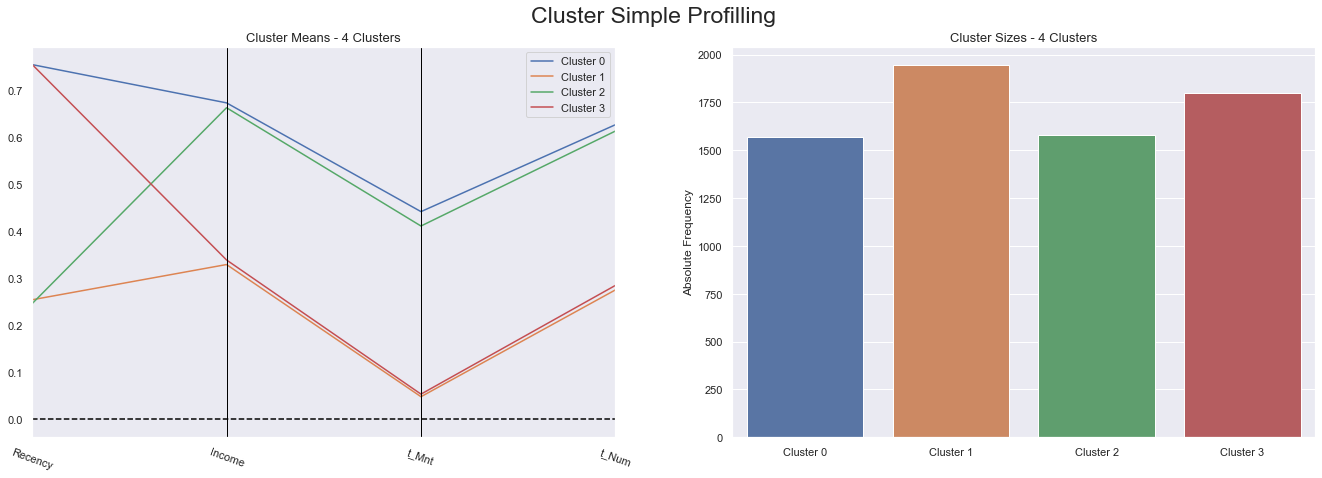

In [154]:
cluster_profiles(cstm_v_k4,["k_label"], figsize=(23, 7))

- Cluster 0 are the individuals that haven't bought anything in a while and they have a lower income, that could a reason why they dont't spent that much. We can see them as the less valuable costumers. 
- Cluster 1 are the costumers that have bought in less days and have a higher income, that is why they spent more and consume more in terms of number. We say they are the more valuables costumers.
----------------------------------------------------------------------------------------------------------------------
- We should focus on keeping the clients from cluster 1 and 2. 
- Cluster 0 and 3 are the ones with more individuals, so we should find ways to attract this consumers.

## 5.4. Business & Marketing insights

x) Creating the dataframe

In [180]:
df_copy = df.copy()
cols_to_drop = ['Recency','Income', 'MntMeat&Fish', 'MntEntries', 'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts', 'MntAdditionalRequests', 'NumAppPurchases', 'NumTakeAwayPurchases', 'NumStorePurchases', 'Name']
df_copy = df.drop(columns=cols_to_drop).copy()
bus_mkt0 = pd.merge(cstm_v_k4, df_copy, on='CustomerID')

cols_to_drop2 = ['Recency','Income','t_Mnt','t_Num','NumOfferPurchases']
bus_mkt0 = bus_mkt0.drop(columns=cols_to_drop2).copy()
bus_mkt = pd.merge(bus_mkt0, cstm_value, on='CustomerID')
#bus_mkt.columns

### 5.4.1. Group by to characterize demographically the  clusters

x) BY `Age` and `age_group`

In [181]:
avg_age = bus_mkt.groupby('k_label')['Age'].mean()
avg_age

k_label
0    48.427024
1    44.669753
2    48.646388
3    45.005003
Name: Age, dtype: float64

In [182]:
#mode_age_group= bus_mkt.groupby('k_label')['age_group'].apply(lambda x: x.mode()[0])
#mode_age_group

In [183]:
count_age_g = bus_mkt.groupby('k_label')['age_group'].value_counts()
count_age_g

k_label  age_group
0        45-65        748
         35-45        405
         25-35        205
         65+          152
         18-25         59
1        45-65        778
         35-45        662
         25-35        415
         65+           60
         18-25         27
2        45-65        782
         35-45        409
         25-35        194
         65+          137
         18-25         56
3        45-65        734
         35-45        616
         25-35        353
         65+           61
         18-25         33
Name: age_group, dtype: int64

In [184]:
# Calculate mean income by cluster and age group
mean_income = bus_mkt.groupby(['k_label', 'age_group'])['Income'].mean()
mean_income

k_label  age_group
0        18-25        112099.762712
         25-35        107808.682927
         35-45        103365.829630
         45-65        102370.105615
         65+          109816.736842
1        18-25         34443.259259
         25-35         43470.249398
         35-45         51672.621752
         45-65         58731.726221
         65+           56709.416667
2        18-25        109096.375000
         25-35        107941.865979
         35-45        101019.836186
         45-65        101295.427110
         65+          107614.043796
3        18-25         37391.112121
         25-35         44153.232578
         35-45         52665.695617
         45-65         60619.802316
         65+           57649.352459
Name: Income, dtype: float64

x) BY `Gender`

In [185]:
#mode_gen= bus_mkt.groupby('k_label')['Gender'].apply(lambda x: x.mode()[0])
#mode_gen

In [186]:
count_gen = bus_mkt.groupby('k_label')['Gender'].value_counts()
count_gen

k_label  Gender
0        0         1139
         1          430
1        0         1419
         1          525
2        0         1171
         1          407
3        0         1323
         1          476
Name: Gender, dtype: int64

x) BY `Marital Status`

In [187]:
#mode_mstatus= bus_mkt.groupby('k_label')['Marital_Status'].apply(lambda x: x.mode()[0])
#mode_mstatus

In [188]:
count_mstatus = bus_mkt.groupby('k_label')['Marital_Status'].value_counts()
count_mstatus

k_label  Marital_Status
0        MARRIED           1030
         SINGLE             317
         DIVORCED           161
         WIDOW               61
1        MARRIED           1253
         SINGLE             467
         DIVORCED           170
         WIDOW               54
2        MARRIED           1023
         SINGLE             328
         DIVORCED           148
         WIDOW               79
3        MARRIED           1196
         SINGLE             408
         DIVORCED           151
         WIDOW               44
Name: Marital_Status, dtype: int64

x) BY `Education`

In [189]:
#mode_edu= bus_mkt.groupby('k_label')['Education'].apply(lambda x: x.mode()[0])
#mode_edu

In [190]:
count_edu = bus_mkt.groupby('k_label')['Education'].value_counts()
count_edu

k_label  Education 
0        GRADUATION    782
         PHD           390
         MASTER        280
         HIGHSCHOOL    116
         BASIC           1
1        GRADUATION    998
         PHD           352
         MASTER        298
         HIGHSCHOOL    201
         BASIC          95
2        GRADUATION    797
         PHD           377
         MASTER        269
         HIGHSCHOOL    135
3        GRADUATION    882
         PHD           358
         MASTER        275
         HIGHSCHOOL    205
         BASIC          79
Name: Education, dtype: int64

x) BY `Kid_Younger6`

In [191]:
#mode_kid_Y6= bus_mkt.groupby('k_label')['Kid_Younger6'].apply(lambda x: x.mode()[0])
#mode_kid_Y6

In [192]:
count_kid_Y6 = bus_mkt.groupby('k_label')['Kid_Younger6'].value_counts()
count_kid_Y6

k_label  Kid_Younger6
0        0               1408
         1                150
         2                 11
1        1               1234
         0                627
         2                 83
2        0               1396
         1                170
         2                 12
3        1               1146
         0                592
         2                 61
Name: Kid_Younger6, dtype: int64

x) BY `Children_6to18`

In [193]:
#mode_kid_6to18= bus_mkt.groupby('k_label')['Children_6to18'].apply(lambda x: x.mode()[0])
#mode_kid_6to18

In [194]:
count_kid_6to18 = bus_mkt.groupby('k_label')['Children_6to18'].value_counts()
count_kid_6to18

k_label  Children_6to18
0        0                  930
         1                  619
         2                   20
1        0                 1001
         1                  900
         2                   43
2        0                  865
         1                  671
         2                   42
3        1                  882
         0                  870
         2                   47
Name: Children_6to18, dtype: int64

### 5.4.2. Group by to characterize the clusters in a marketing view point

- Fazer os groups bys para as outras vars de marketing
- fazer o loyalty - quem tem maior rácio de campanhas aderidas/total de campanhas e fazer group by
- criar variável do n~º de dias sócio (+dias e + t_MNT e + loyalty) pe
- pensar em fazer basic group by entre variáveis de education pe e a campaing pe

In [195]:
bus_mkt.columns

Index(['k_label', 'Date_Adherence', 'NumAppVisitsMonth', 'Complain',
       'Education', 'Marital_Status', 'Kid_Younger6', 'Children_6to18',
       'Gender', 'Age', 'age_group', 'Response_Cmp1', 'Response_Cmp2',
       'Response_Cmp3', 'Response_Cmp4', 'Response_Cmp5', 'Recency', 'Income',
       't_Mnt', 't_Num'],
      dtype='object')

x) BY `Complain`

In [199]:
#count_complain = bus_mkt.groupby('k_label')['Complain'].value_counts()
#count_complain

In [178]:
# Calculate ratio of Complain equals to 1 by cluster
complain_ratio = count_complain.loc[:, 1] / count_complain.groupby('k_label').sum()
complain_ratio

k_label
0    0.012747
1    0.010288
2    0.007605
3    0.009450
Name: Complain, dtype: float64

Note: Clusters 0 and 1 have higher complain rates (1ª-0 ; 2ª-1)

x) BY `NumAppVisitsMonth`

In [204]:
count_AppVisits = bus_mkt.groupby('k_label')['NumAppVisitsMonth'].sum()
count_AppVisits

k_label
0     6049
1    12786
2     6218
3    11839
Name: NumAppVisitsMonth, dtype: int64

x) Add column `t_ad`

In [196]:
bus_mkt ['t_ad'] = bus_mkt['Response_Cmp1'] + bus_mkt['Response_Cmp2'] + bus_mkt['Response_Cmp3'] + bus_mkt['Response_Cmp4']+ bus_mkt['Response_Cmp5']

In [205]:
#total number of adherences to the campains 
bus_mkt['t_ad'].sum()

2176

In [90]:
bus_mkt['sucess'] = (bus_mkt['t_ad'])/(bus_mkt['t_ad'].sum())

In [91]:
bus_mkt=bus_mkt.drop(columns ={"Response_Cmp1", "Response_Cmp2", 
                     "Response_Cmp3", "Response_Cmp4", 
                    "Response_Cmp5"})

### 5.4.2 Clustering analysis - camapin sucess 

In [ ]:
bus_mkt_0 = bus_mkt[bus_mkt['k_label'] == 0]
bus_mkt_0.describe()


In [ ]:
bus_mkt_1 = bus_mkt[bus_mkt['k_label'] == 1]
bus_mkt_1.describe()

In [ ]:
bus_mkt_2 = bus_mkt[bus_mkt['k_label'] == 2]
bus_mkt_2.describe()

In [ ]:
bus_mkt_3 = bus_mkt[bus_mkt['k_label'] == 3]
bus_mkt_3.describe()